# __Describing the whole DFN domain as a set of fracture domains__

### Problem statement

In DFN modelling, the studied domain may be composed of different fracture domains, each one corresponding to different properties and statistics (fracture density, orientations…). 

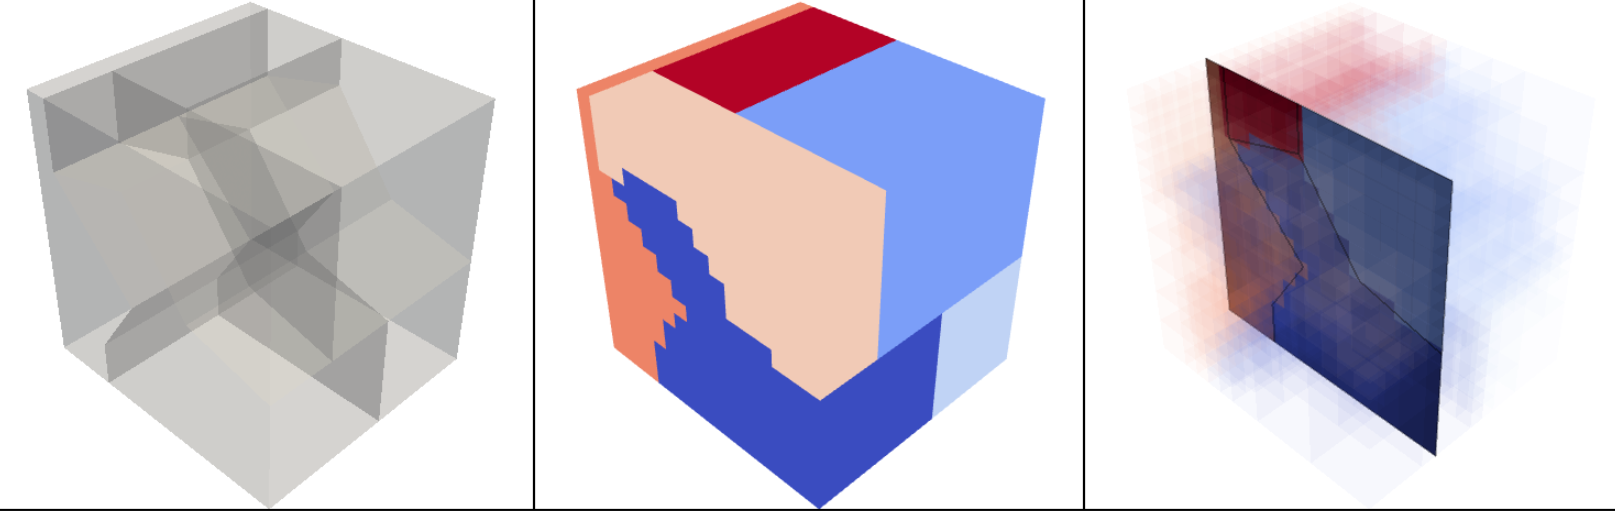

### What will you learn ?
- Use STL geometry files to describe fracture domains geometry 
- Translate and rotate fracture domains 
- Discretize space using an octree grid based on fracture domain geometry 

### DFN.Lab model

Prerequisites:
* Create a spatial domain 

In this example, we create a parallelepiped domain of size $L_x=110$, $L_y=120$, $L_z=120$ composed of 6 sub-domains. Each sub-domain is assigned different properties. The final domain is then discretized using an octree representation (that may be used for DFN generation). 

The required modules are __DataAnalysis__ and __Basis__.
<br>
We use [_pyvista_](https://docs.pyvista.org) for embedded visualization of generated networks in our notebook.
<br>
Plot functions are implemented in [Tutorials/sources/functions.py](https://gitlab.com/fractorylab/dfnlab/-/blob/new_tutos/Tutorials/sources/functions.py).

In [1]:
import dfnlab.Basis as dfn
import dfnlab.DataAnalysis as dfn_data
import os

________________________

## Import sub-domain geometries from STL files¶ 

We import all sub-domains geometry (from STL files) and translate them so that the final system is centered in (0,0,0). This is not mandatory, but take it into account when creating your system.  


In [2]:
stlReaders = []

for i in range(1,7) :
    reader = dfn_data.STLReader("./sources/STL-Example/dom"+str(i)+".stl")
    reader.translate((5, 30, 60));
    stlReaders.append(reader)

If needed, you can even rotate sub-domains using this command: 
`reader.rotate(axis, angle)` 

## Create the fracture domains

A fracture domain is described as  a set of geometrical volumes and their corresponding properties. 

In [3]:
density=0;
fractureDomains = []
for reader in stlReaders :
    density = density + 0.1
    prop = dfn.PoissonProperties()
    prop.setPositionsUniform()
    prop.setSizesPowerlaw(3,1)
    prop.setOrientationsUniform()
    prop.setStopDensity(density)
    
    #Create a fracture domain
    fractureDomain = dfn.FractureDomain(reader.getIrregularDomain(),prop)
    fractureDomains.append(fractureDomain)

## Create the System and add your fracture Domains

We create a parallelepiped system (of size $L_x=110$, $L_y=120$, $L_z=120$) centered in (0,0,0), and populate it with the different fracture domains. 

In [4]:
system = dfn.System()
system.buildParallelepiped(center=[0, 0, 0], L1=110,L2=120,L3=120) 
for fractureDomain in fractureDomains :
    system.addFractureDomain(fractureDomain)

## Create an Octree from fracture domain geometry

An octree is a data structure discretizing the system volume according to the fracture domains. We need to provide a “depth” limit  corresponding to the octree grid  refinement level (the larger, the more precise the discretization). A depth limit of 4 means that the system size may be splitted by half until 4 times, to catch properly the geometry. 


In [5]:
system.populateOctree(4)

path = os.getcwd()
fileName = os.getcwd()+"/Tmp/6domainsLvl4.octree"
system.saveOctree(fileName)

## Access properties from any position in space
The Octree let you access the property of any area of the system 

In [6]:
print("The generation properties at position [0,6,3] is :", system.getProperties(position=[0,6,3]).getDomainName())
print("The density at position [0,6,3] is :", system.getProperties(position=[0,6,3]).getDensity())
print("The density at position [-20,-10,80] is :", system.getProperties(position=[-20,-10,80]).getDensity())

The generation properties at position [0,6,3] is : ./sources/STL-Example/dom1.stl
The density at position [0,6,3] is : 0.1
The density at position [-20,-10,80] is : 0.6


## Visualisation

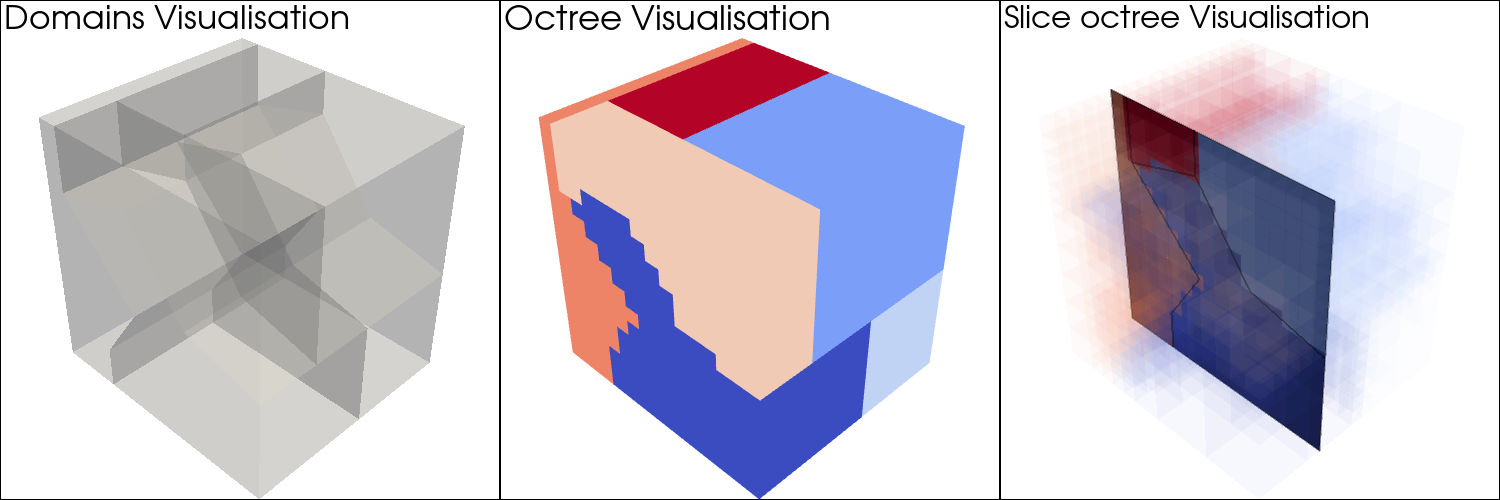

In [7]:
from sources.functions import plot_octreeAndDomains
path = os.getcwd()
pathFolder = os.getcwd()+"/Tmp"
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
plot_octreeAndDomains(pathFolder,system)